In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as spio

# 5.1 Monte Carlo preliminaries

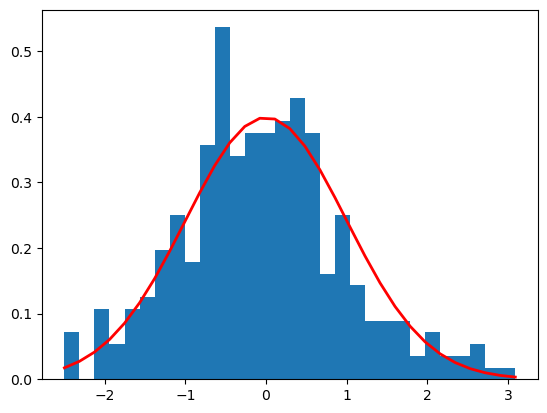

In [7]:
mu, sigma = 0, 1

L = 300
samples = np.random.normal(mu, np.sqrt(sigma), L)

count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [8]:
# More samples = higher quality estimates and vice versa
print(f'mean {np.mean(samples)}')
print(f'mean {np.var(samples)}')

mean -0.0482291419757719
mean 1.058575916985421


# 5.2 Importance sampling

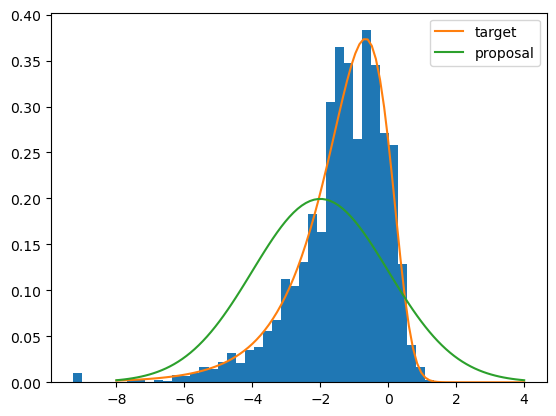

In [13]:
mu, sigma = -2, 4

L = 1000
x = np.random.normal(mu, np.sqrt(sigma), L)

# Algo: slide 17, L5

# Target function
def pi(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)

# Proposal density
def r(x):
    return 1/np.sqrt (2*np.pi*sigma)*np.exp (-((x-mu)**2)/2/sigma)

# Calculate weights
w = pi(x)/r(x)
                                                        
# Plot a weighted histogram
plt.hist(x,weights=w, bins = 50, density=True)

# Plot the target distribution and the proposal
xv = np. linspace(-8, 4, 100)
plt.plot(xv, pi(xv), label='target')
plt.plot(xv, r(xv), label='proposal')
plt.legend()
plt.show()


### Comment: In areas where proposal > target (right side), our approximations are more accurate. To the left, where target > proposal, our approximations are worse.

In [15]:
estMean = (1/L)*np.sum(x*w)
estVar = (1/L)*np.sum(w*(estMean-x)**2)

print(f'Estimated mean {estMean}')
print(f'Estimated variance {estVar}')

Estimated mean -1.403141892575331
Estimated variance 1.9001772286101857


# 5.4 A first Markov chain

$$
x[k+1] = 0.9x[k] + v[k], \quad v[k] \sim N(0,0.19)
$$

## a)
The equation is a markov chain because all the information about the step $k+1$ is contained in step $k$. Formally,

$$
p(x[k+1] | x[k],x[k-1],...,x[1]) = p(x[k+1]|x[k]).
$$

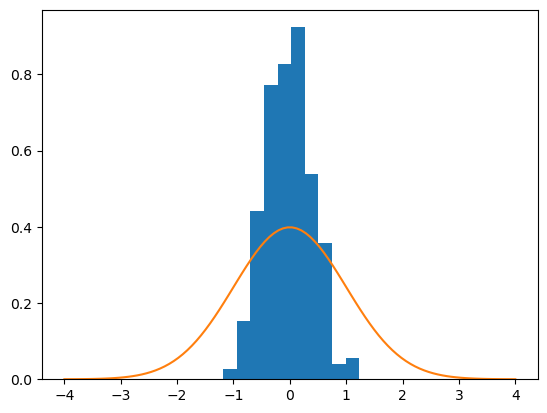

In [20]:
K = 300
x = np.zeros(K)
x[0] = 1
for k in range(K-1):
    x[k+1] = 0.9*x[k] + np.random.normal(0, 0.19)
    
xv = np.linspace ( -4 ,4 ,100)
plt.hist(x,bins =10, density=True)
plt.plot(xv ,1/ np.sqrt (2* np.pi)*np.exp ( -.5*xv **2))
plt.show ()

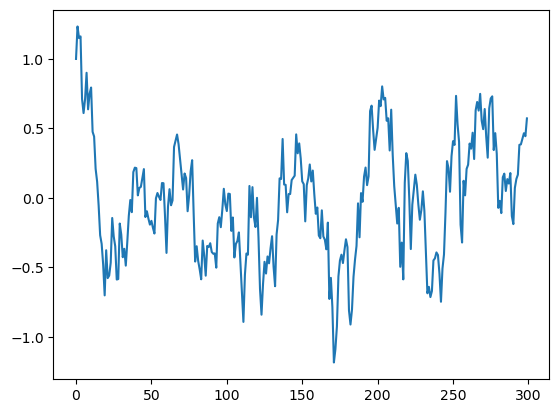

In [21]:
plt.plot(x)

# Exercise 5.5

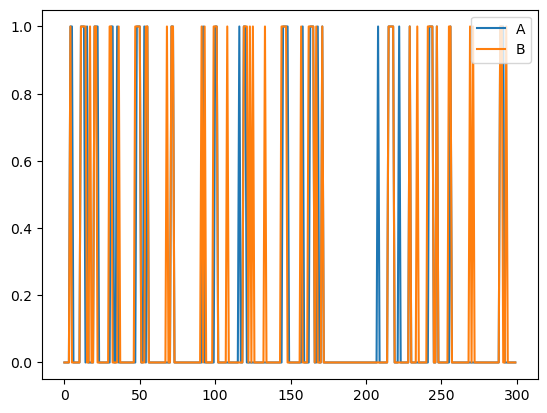

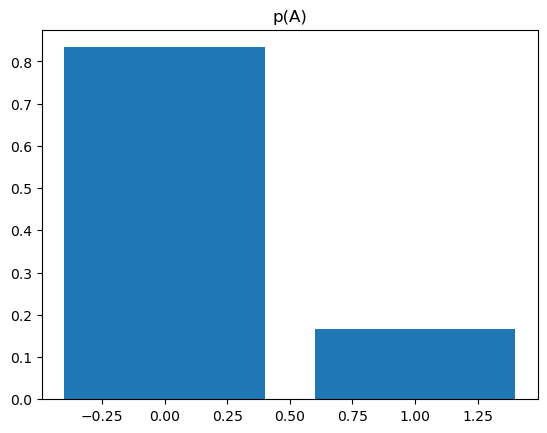

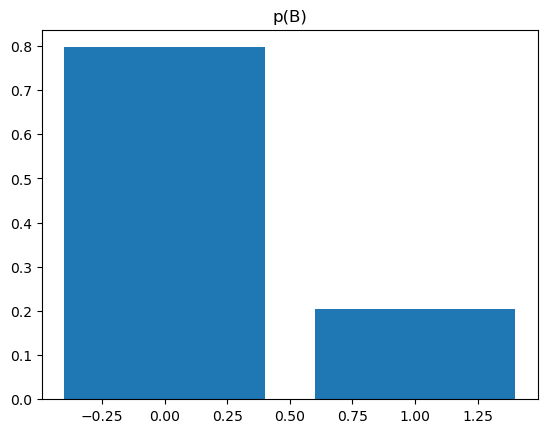

In [23]:
K = 300

A = np.zeros(K)
B = np.zeros(K)

for k in range(1,K-1):
    # Sample A[k] from p(A|B[k-1])
    if B[k-1] == 0:
        A[k] = np.random.binomial(1, 0.03/0.84)
    else:
        A[k] = np.random.binomial(1, 0.07/0.16)
    # Sample B[k] from p(B|A[k])
    if A[k] == 0:
        B[k] = np.random.binomial(1, 0.1)
    else:
        B[k] = np.random.binomial(1, 0.7)
        
plt.plot(A,label='A')
plt.plot(B,label='B')
plt.legend(loc='upper right')
plt.show ()

plt.bar(x=(0 ,1) ,height =(sum(1-A)/K,sum(A)/K))
plt.title('p(A)')
plt.show ()

plt.bar(x=(0 ,1) ,height =(sum(1-B)/K,sum(B)/K))
plt.title('p(B)')
plt.show ()    